# Clustering
Una de las ramas del machine learning es el aprendizaje no supervisado, el cual se encarga de encontrar patrones en los datos sin la necesidad de tener etiquetas. Dentro de este tipo de aprendizaje se encuentra el clustering. 

**Qué es Clustering :** encontrar las similitudes entre los datos y agruparlos en función de esas similitudes.



## Desarrollo de tu primer clustering

In [16]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
import seaborn as sns

In [8]:
# Se simula la creacion de los clusters con la funcion make_blobs, la cual recibe la cantidad de observaciones, la cant de clusters, su dimensionalidad, feauters, lo lejos que
# esta cada una de su centro y el random_state para garantizar reproducibilidad
X, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

Notemos que se crea tambien un y, que nos informa a qué cluster pertenencen realmente los datos, sin embargo, como esto no es una tarea de clasificacion, si no de clusterizacion, en un entorno real esto no existe, en este caso solo se usa por cuestiones pedagocicasm, para comparar los resultados obtenidos con los reales.

In [10]:
df_blobs = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'y':y})
df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [13]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title = f'{len(y_uniques)} Clusters',
            kind = 'scatter',
            x='x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

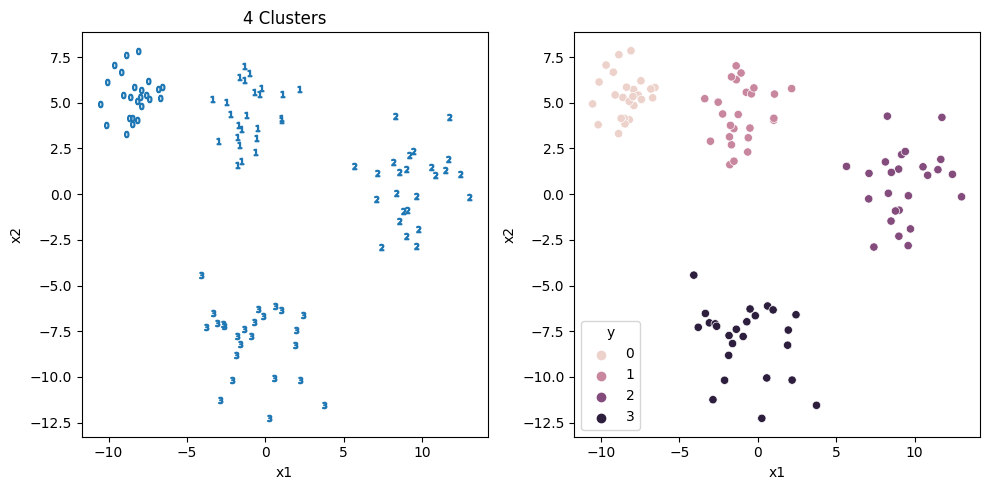

In [26]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
x, y = df_blobs[['x1', 'x2']], df_blobs['y']
plot_2d_clusters(x,y,ax[0])
sns.scatterplot(x='x1', y='x2', hue='y', data=df_blobs, ax=ax[1])

plt.tight_layout()
plt.show()

## Aplicando Clustering ( categorizando desconociendo las etiquetas reales ) 

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=7)

y_pred = kmeans.fit_predict(X)

Text(0.5, 1.0, 'Actual 4 Clusters')

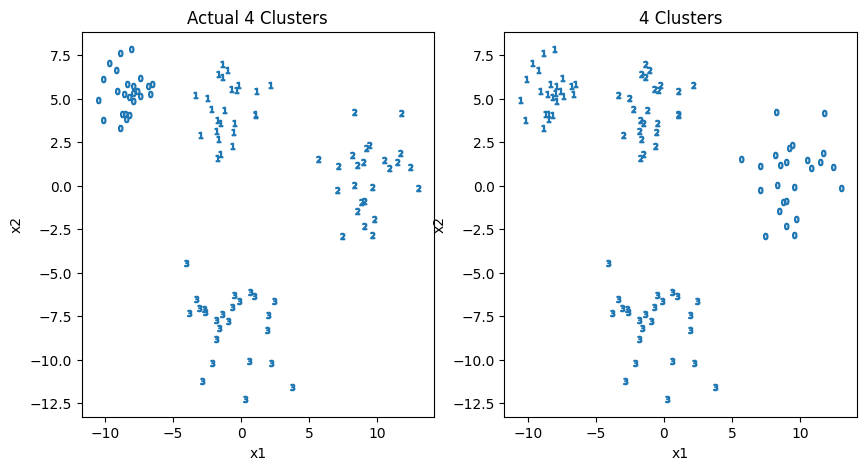

In [31]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_2d_clusters(x,y,ax[0])
plot_2d_clusters(x,y_pred,ax[1])

ax[0].set_title(f'Actual {ax[0].get_title()}')

Supongamos que escogemos la cantidad de clusters incorrecta, igual el se ajusta a los datos de manera 'apropiada' al error que le dimos

Text(0.5, 1.0, 'Actual 4 Clusters')

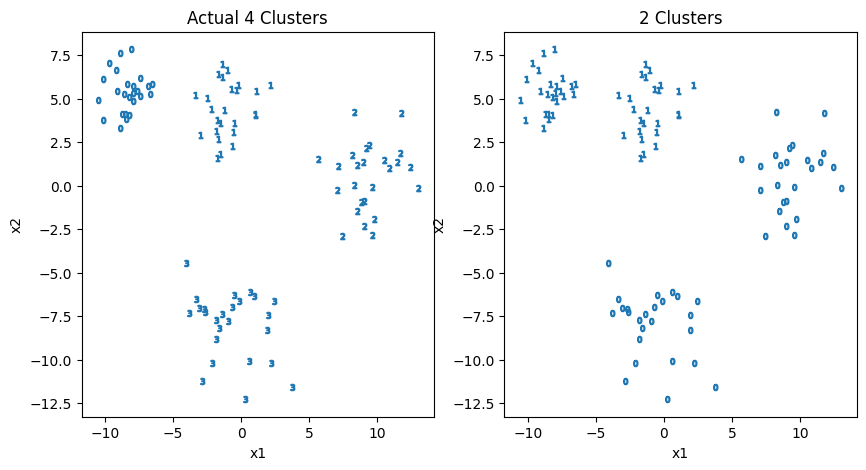

In [32]:

kmeans = KMeans(n_clusters=2, random_state=7)

y_pred = kmeans.fit_predict(X)

fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_2d_clusters(x,y,ax[0])
plot_2d_clusters(x,y_pred,ax[1])

ax[0].set_title(f'Actual {ax[0].get_title()}')

## Cuándo usar clustering
**Usos**
* Mayor contexto de los datos
* Deteccion de outliers estadísticos
* Clasificacion y agrupacion sin variable objetivo predefinida
    * Esto permite hayar patrones en los datos y simplificar sus analisis agrupando los datos en categorias
* Tareas manuales de etiquetado

**Aplicaciones específicas**
* clasificacion de tráfico en una página
* segmentación de clientes por su perfil
* Clasificacion de contenido
* Identificacion de comportamientos fraudulentos
* Ciencia en los deportes
* Muchas más posibilidades...

## Diferencias entre Clustering y Clasificación
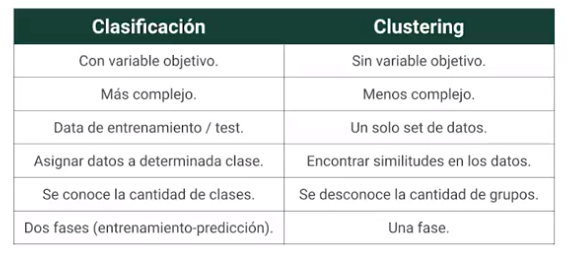

**Nota personal :** Considero que el muestreo aleatorio podria ayudar al clustering, no sé mucho al respecto pero encontré esto https://stats.stackexchange.com/questions/11691/how-to-tell-if-data-is-clustered-enough-for-clustering-algorithms-to-produce-m/11702#11702

**Algunos algoritmos de clustering :** https://www.freecodecamp.org/espanol/news/8-algoritmos-de-agrupacion-en-clusteres-en-el-aprendizaje-automatico-que-todos-los-cientificos-de-datos-deben-conocer/

## ¿Cómo evaluar los modelos de clustering?

* **Coeficiente de Silueta**

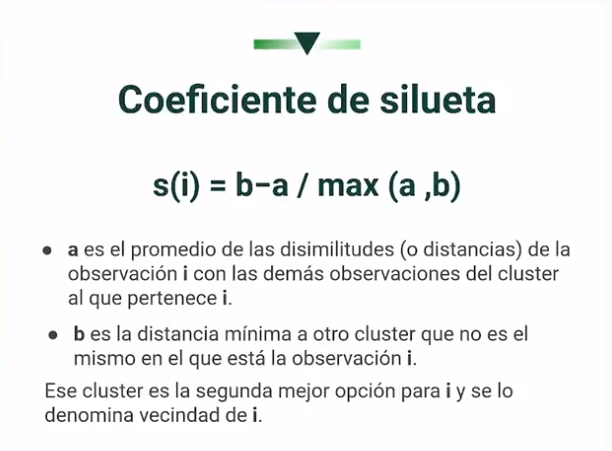
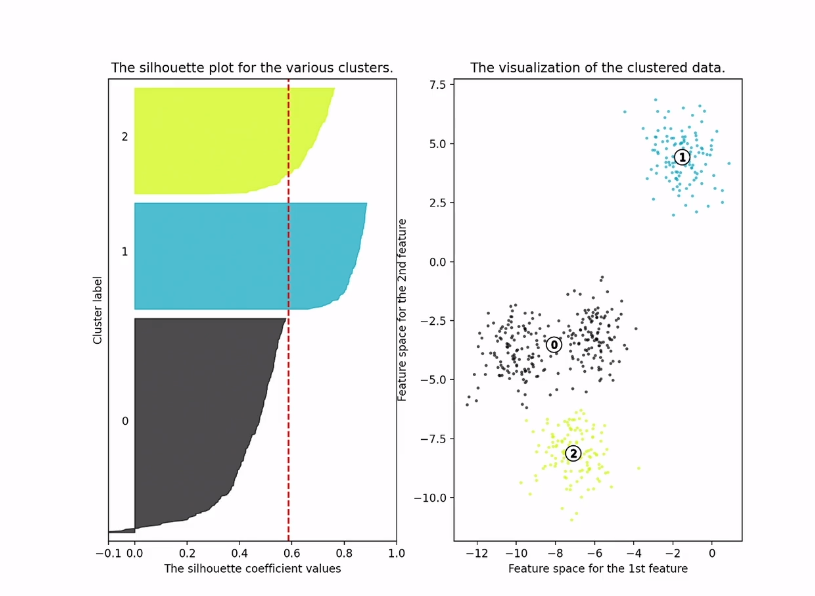

**CORRECCION**:
* a(i): Distancia promedio del punto a todos los demás puntos en su propio cluster (cohesión).
* b(i): Distancia promedio del punto a los puntos del cluster más cercano distinto al suyo (separación).

El Índice de Silueta para ese punto, s(i), se define como:

s(i) = (b(i) - a(i)) / max(a(i), b(i))

---

En resumidas cuentas, el indice de silueta mide que tan cerca esta una observacion de su propio cluster y que tan lejos esta de los demas clusters. 


Esta función devuelve el coeficiente de silueta medio de todas las muestras. Para obtener los valores de cada muestra, utilice silhouette_samples.

El mejor valor es 1 y el peor valor es -1. Los valores cercanos a 0 indican grupos superpuestos. Los valores negativos generalmente indican que se ha asignado una muestra al grupo incorrecto, ya que un grupo diferente es más similar.

**Clusters con tamaño 1**: El índice es 0 para clusters con un solo punto.

**Limitaciones:**

* Funciona mejor para clusters con formas convexas.
* Puede verse afectado por la métrica de distancia utilizada.

**Uso:**

El Índice de Silueta se utiliza para comparar diferentes clusterings obtenidos con el mismo algoritmo y diferentes números de clusters. Un valor promedio más alto del índice indica un mejor clustering.


# KMeans

Aporte de un estudiante de Kaggle : [www.kaggle.com/andyxie/k-means-clustering-implementation-in-python](https://www.kaggle.com/code/andyxie/k-means-clustering-implementation-in-python)

Aporte de un estudiante de platzi : https://github.com/GreatestTrain/clustering/blob/main/kmeans.py

**Pasos:**
1. Indicar la cantidad inicial de clusters
2. Ubicar Centroides aleatoriamente
3. Asignar cada punto al centroide más cercano
4. Mover los centroides al centro (promedio) de los puntos asignados
5. Repetir los pasos 3 y 4 hasta que los centroides no se muevan.

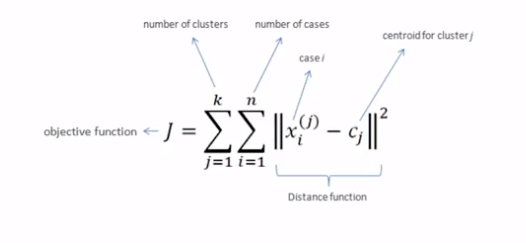


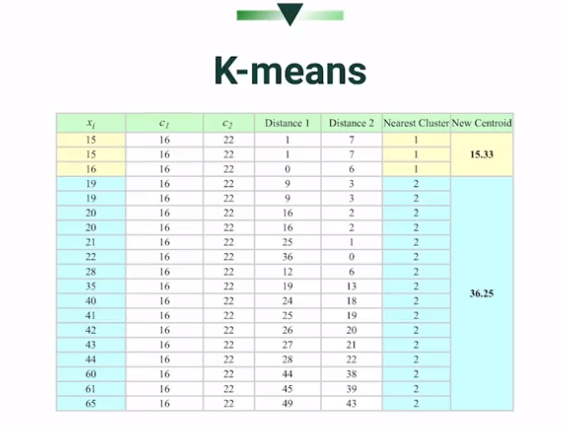
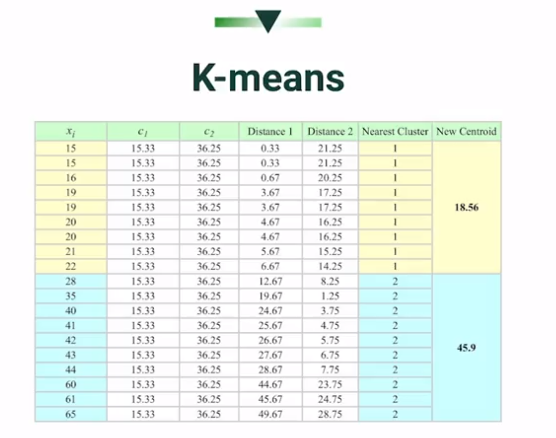

## ¿Cuando usar KMeans?
**Ventajas:**
* Alto Performance
* Simple
* Resultados interpretables
* Garantiza la convergencia
* Se adapta a nuevos datos

**Desventajas:**
* Replicabilidad, ya que es sensible a la inicialización de los centroides
* Le afectan Outliers
* Mejor performance en datos esféricos
* Se debe elegir K manualmente
* Datasets de alta dimensionalidad afectan su performance

**Cuando implementarlo:**
* conozco la cantidad de clusters
* resultados interpretables
* Resultados rápidos
* Datasets de formas esféricas
* Resultados Escalables, a nuevos datos

## Implementación de KMeans
* En su respectivo notebook